In [1]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Enables inline matplotib graphs
%matplotlib inline
# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
# %matplotlib qt5
# %pip install PyQt5
# plt.ion()

In [4]:
%pip install gymnasium
import gymnasium as gym

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Initialize a population randomly based on the population size and dimensions
def initialization(population_size, num_dimensions):
    """
    Initialize the starting population with random individuals.
    Each gene of an individual corresponds to a point on a dimension in the function
    """

    x = np.random.uniform(-1, 1, (population_size, num_dimensions)) # generate the population using the size and dimensions as an ndarray


    return x #return population


# Implement the evaluation function that can evaluate all the solutions in a given population.
def evaluation(x, objective_function):
    """Evaluate the fitness of the population members"""

    fitness = np.array([objective_function(individual) for individual in x]) 

    return fitness


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def crossover(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    if np.random.rand() <= p_crossover: #only use crossover when the a random number is lower then the crossover chance
      parent1, parent2 = x_parents

      n = np.shape(x_parents)[1] #define the dimensions of a individual based on the second parent

      crossover_point = np.random.randint(1,n) # generate a random point in the range from 1 till the dimensions

      #create the children based on crossover point with one half being one parent and the other being another parent
      child1 = np.hstack([parent1[:crossover_point], parent2[crossover_point:]])
      child2 = np.hstack([parent2[crossover_point:], parent1[:crossover_point]])
      offspring = [child1, child2] #return children
    else:
      parent1, parent2 = x_parents
      offspring = [parent1, parent2] # if no crossover happens then the parents are returned


    return offspring


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def mutation(x, mutation_rate, population_size, num_dimensions):
    """Apply mutation to an individual."""

    if np.random.rand() <= mutation_rate: #if the random number is under the chance of having mutation then perform the mutation
      x = np.random.uniform(-1, 1, num_dimensions) #create a bit of noise which displaces the individuals genes in a radius of 5

    return x


def parent_selection(x, f):
    """Select parents for the next generation"""

    fitness_sum = np.sum(f) # sum the fitnesses

    probability = f / fitness_sum #normalize the fitnesses for every individual to get a chance

    indice = [i for i in range(len(x))] #give each individual a id/number for the index

    numbers = np.random.choice(indice, size=2, p=probability, replace=False) #choose out of the id's

    #numbers = np.argsort(f)[:2]
    x_parents = [x[i] for i in numbers] #search based on the random id/number
    f_parents = [f[i] for i in numbers]

    return x_parents, f_parents


def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""

    limit = len(x) #see the maximum carry case of the population

    combined_x = np.concatenate([x, x_offspring]) #combine the individuals in one list
    combined_f = np.concatenate([f, f_offspring]) #cobmine all the fitnesses in one list

    begin = len(combined_f) - limit
    index = np.argsort(combined_f)[begin:] #sort the fitnesses from low to high and then only go to the maximum carry limit

    #return a list of those individuals with the best fitnesses
    x = [combined_x[i] for i in index]
    f = [combined_f[i] for i in index]

    return x, f

In [31]:

inp = 4 # Number of input neurons
hid = 16 # Number of hidden neurons
out = 2 # Nubmer of output neurons

#Open AI gym environment
env = gym.make("CartPole-v1")

# CartPole evaluation function
def cartpole(x):

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs
    amount_w1 = inp * hid
    amount_w2 = hid * out

    w1 = np.array(x[:amount_w1]).reshape(inp, hid) #weights for the first layer
    w2 = np.array(x[amount_w1:]).reshape(hid, out) #weights for the second layer
    #########

    # Reset environment
    observation, info = env.reset(seed = 0)

    rew = 0 # Initial reward
    step = 0; #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000:
      ###################
      # PLEASE FILL IN
      # Hint: Provide input to ANN and find the output to be the action
      #get the dot product of the weights and the observation which helps get h and apply tanh activation on it
      h = np.tanh(np.dot(observation, w1))
      output = np.dot(h, w2)
      action = np.argmax(output) #this will give the highest value position for the action value

      observation, reward, done, tr, info = env.step(action)
      step+=1 # step counter
      rew = rew + reward # after each step increment reward

    env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)



# CartPole evaluation function with video recording
def cartpole_record_video(x):
    tmp_env = gym.make("CartPole-v1", render_mode="rgb_array")

    # Video recording function - be sure to check the folder path - you should see the video here:content/video/cartpole
    env = gym.wrappers.RecordVideo(env=tmp_env, video_folder=".", name_prefix="cartpole")

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs

    #########
    amount_w1 = inp * hid
    amount_w2 = hid * out

    w1 = np.array(x[:amount_w1]).reshape(inp, hid)
    w2 = np.array(x[amount_w1:]).reshape(hid, out)
    # Reset environment
    observation, info = env.reset(seed = 0)

    #env.start_video_recorder()


    rew = 0 # Initial reward
    step = 0; #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000: # run nStep number of time

      ###################
      # PLEASE FILL IN
      # Hint: Provide input to ANN and find the output to be the action
      # action = ?
      h = np.tanh(np.dot(observation, w1))
      output = np.dot(h, w2)
      action = np.argmax(output)

      # action should be provided based on the output of the artifial neural network
      observation, reward, done, tr, info = env.step(action)
      step+=1 # step counter
      rew = rew + reward # after each step increment reward
      #env.render()

    #env.close_video_recorder()
    env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)




# CartPole evaluation function for visualizing the cartpole environment
def cartpole_visualize(x):
    tmp_env = gym.make("CartPole-v1", render_mode="human")

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs
    amount_w1 = inp * hid
    amount_w2 = hid * out

    w1 = np.array(x[:amount_w1]).reshape(inp, hid)
    w2 = np.array(x[amount_w1:]).reshape(hid, out)
    #########

    # Reset environment
    observation, info = tmp_env.reset(seed = 0)

    rew = 0 # Initial reward
    step = 0; #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000: # run nStep number of time

      ###################
      # PLEASE FILL IN
      # Hint: Provide input to ANN and find the output to be the action
      # action = ?
      h = np.tanh(np.dot(observation, w1))
      output = np.dot(h, w2)
      action = np.argmax(output)

      # action should be provided based on the output of the artifial neural network
      observation, reward, done, tr, info = tmp_env.step(action)
      step+=1 # step counter
      rew = rew + reward # after each step increment reward
      tmp_env.render()

    tmp_env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)




# Implement your Evolutionary Algorithm to find the ANN weigths that can balance the CartPole
# Feel free to add any functions, such as initialization, crossover, etc.. to make it work!
def ea(
    # hyperparameters of the algorithm
    population_size,
    max_fit_evals,  # Maximum number of evaluations
    p_crossover,  # Probability of performing crossover operator
    m_rate,  # mutation rate
    objective_function,  # objective function to be minimized
):
    # Calculate the maximum number of generations
    # Maximum number of function evaluations should be the same independent of the population size
    max_generations = int(max_fit_evals / population_size)  # DO NOT CHANGE



    ################################################################
    # PLEASE FILL IN
    dim = (inp * hid) + (hid * out) #calculate the dimension of the individual
    x = initialization(population_size, dim) #initialize the population
    f = evaluation(x, objective_function) #evaluate the base fitnesses of the initial population

    ################################################################

    # Find the best individual and append to a list to keep track in each generation
    idx = np.argmax(f)
    x_best = [x[idx]]
    f_best = [f[idx]]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Perform the EA steps

        ################################################################
        x_parents, f_parents = parent_selection(x, f) #select the parent for the new generation

        x_offspring = []
        f_offspring = []

        #try crossover and mutation population times
        for i in range(len(x)):
          children = crossover(x_parents, p_crossover) #perform crossover and get the children

          for child in children:
            mutated_child = mutation(child, m_rate, population_size, dim) #for child see if the dna of the child mutates
            x_offspring.append(mutated_child) #append the mutated child to the offspring list
            f_offspring.append(objective_function(mutated_child))#get respective fitnesses of the children



        x, f = survivor_selection(x, f, x_offspring, f_offspring) #see which individuals make the next generation
        ################################################################


        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best < f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])


    return x_best, f_best  # return the best solution (ANN weights) and the fitness in each generation

In [32]:
# Dummy parameters, please add or remove based on your implementation
kwargs = {
    "population_size": 20,
    "max_fit_evals": 1000,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.1,  # mutation rate
    "objective_function": cartpole,
}
# Run your algorithm once and find the best ANN weigths found
env = gym.make("CartPole-v1")
x_best, f_best = ea(**kwargs)


# Print the best ANN weigths found and best fitness
print("Best ANN parameters found:",x_best[-1])
print("Best fitnes found:",f_best[-1])

# Evaluate your ANN weights again and record the video
if f_best[-1] >= 1000:
  cartpole_record_video(x_best[-1] )
  #  cartpole_visualize(x_best[-1] )
else:
  print("The best fitness 1000 was not found, try again!!")



Best ANN parameters found: [ 0.34281925  0.61145455 -0.73317463  0.90947345 -0.75475022 -0.63321926
  0.28062663 -0.24771705  0.30083323 -0.07937986  0.38522915 -0.74651823
  0.12989417  0.46584944 -0.08244045  0.34231504  0.33249934  0.63651216
 -0.99648917 -0.2197327  -0.33384208 -0.58409354 -0.4216591   0.78345457
 -0.42119617  0.6428173  -0.70293759  0.09337579 -0.89253395  0.45766361
 -0.32920861 -0.80739806 -0.27565483 -0.81454927  0.16081309  0.25669763
  0.73772384 -0.22705435 -0.71123677 -0.70517935  0.91036617  0.07388429
 -0.74984373 -0.32642801  0.3217709   0.41728684  0.31214697 -0.96640051
  0.84337426  0.80389228 -0.51953603 -0.80787881 -0.55239542 -0.66315108
  0.85940756 -0.47500766 -0.59293371  0.32436935  0.0798057  -0.67514034
  0.5123652   0.61975136 -0.42733154  0.92294339  0.55498573  0.40836982
 -0.22004943 -0.72227212  0.56898731  0.43626913  0.84894362 -0.59388842
 -0.09020666 -0.53375184  0.38399057 -0.61558291  0.33872009 -0.6027416
  0.76336654 -0.74537907 

DependencyNotInstalled: moviepy is not installed, run `pip install "gymnasium[other]"`

In [8]:
runs = 10
best_xs = []
best_fs = []

kwargs = {
    "population_size": 20,
    "max_fit_evals": 1000,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.1,  # mutation rate
    "objective_function": cartpole,
}

for i in range(runs):
  x_best, f_best = ea(**kwargs)
  best_xs.append(x_best)
  best_fs.append(f_best)
  print(f"Run {i+1}")
  print("Best fitnes found:",f_best[-1])

average_fs = np.mean(best_fs, axis=0)
std_fs = np.std(best_fs, axis=0)



Run 1
Best fitnes found: 1000.0
Run 2
Best fitnes found: 193.0
Run 3
Best fitnes found: 43.0
Run 4
Best fitnes found: 108.0
Run 5
Best fitnes found: 172.0
Run 6
Best fitnes found: 1000.0
Run 7
Best fitnes found: 221.0
Run 8
Best fitnes found: 446.0
Run 9
Best fitnes found: 180.0
Run 10
Best fitnes found: 138.0


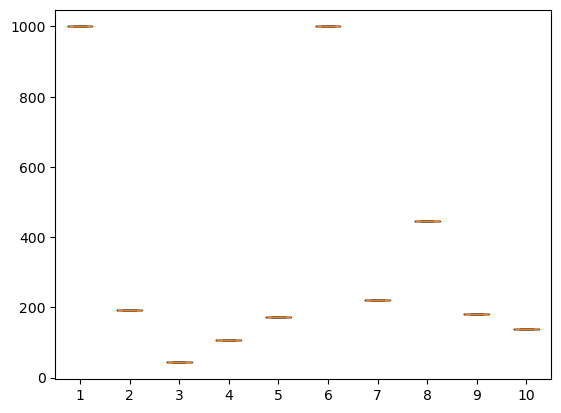

In [9]:
plt.boxplot(best_fs)
plt.show()

In [10]:
print(f" experiment average: {average_fs[1]}")
print(f" experiment std: {std_fs[1]}")

 experiment average: 350.1
 experiment std: 339.68322007423325
